In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px



In [2]:
import warnings
warnings.filterwarnings('ignore')



# ****To read the csv file****

In [3]:
data= pd.read_csv('/content/Shark Tank India.csv')
df = data.copy() #creating copy
df.head() #top 5 rows

,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
0,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Basic Observations:**

In [4]:
df.shape

(320, 64)

It has 64 column with 320 rows

In [5]:
df.drop_duplicates() #to drop duplicate rows
df.shape

(320, 64)

There is no duplicates

In [6]:
df.columns #to check on the attributes

Index(['Season Number', 'Season Start', 'Season End', 'Episode Number',
       'Episode Title', 'Pitch Number', 'Startup Name', 'Industry',
       'Business Description', 'Company Website', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              320 non-null    int64  
 1   Season Start               320 non-null    object 
 2   Season End                 320 non-null    object 
 3   Episode Number             320 non-null    int64  
 4   Episode Title              320 non-null    object 
 5   Pitch Number               320 non-null    int64  
 6   Startup Name               320 non-null    object 
 7   Industry                   320 non-null    object 
 8   Business Description       320 non-null    object 
 9   Company Website            309 non-null    object 
 10  Number of Presenters       320 non-null    int64  
 11  Male Presenters            281 non-null    float64
 12  Female Presenters          149 non-null    float64
 13  Transgender Presenters     3 non-null      float64

In [8]:
df.describe() #to describe each column

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,...,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount
count,320.000000,320.000000,320.000000,320.000000,281.000000,149.000000,3.0,315.000000,184.000000,134.000000,...,11.000000,8.000000,8.000000,0.0,21.000000,21.000000,4.000000,2.000000,2.000000,2.000000
mean,1.525000,21.550000,160.500000,2.078125,1.722420,1.194631,1.0,0.187302,2018.472826,355.947761,...,31.090909,19.998782,6.462500,NaN,38.138571,5.190314,36.250000,32.750000,1.500000,23.500000
std,0.500157,14.676362,92.520268,0.847358,0.866744,0.429925,0.0,0.390774,2.495750,918.888781,...,15.332675,10.946848,5.326199,NaN,26.305707,5.599211,23.935678,10.960155,1.414214,15.556349
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,2005.000000,-1.000000,...,10.000000,0.000253,1.000000,NaN,5.000000,1.000000,10.000000,25.000000,0.500000,12.500000
25%,1.000000,9.000000,80.750000,2.000000,1.000000,1.000000,1.0,0.000000,2017.000000,0.000000,...,23.500000,14.995000,4.050000,NaN,18.750000,1.500000,21.250000,28.875000,1.000000,18.000000
50%,2.000000,21.000000,160.500000,2.000000,2.000000,1.000000,1.0,0.000000,2019.000000,100.000000,...,25.000000,22.500000,5.000000,NaN,30.000000,3.000000,35.000000,32.750000,1.500000,23.500000
75%,2.000000,33.000000,240.250000,2.000000,2.000000,1.000000,1.0,0.000000,2020.000000,247.500000,...,40.000000,26.250000,7.750000,NaN,50.000000,5.000000,50.000000,36.625000,2.000000,29.000000
max,2.000000,51.000000,320.000000,6.000000,6.000000,3.000000,1.0,1.000000,2022.000000,7200.000000,...,60.000000,33.330000,17.500000,NaN,100.000000,20.000000,65.000000,40.500000,2.500000,34.500000


To check on presence of null value:

In [9]:
df.isnull().sum()

Season Number                0
Season Start                 0
Season End                   0
Episode Number               0
Episode Title                0
                          ... 
Amit Debt Amount           316
Guest Investment Amount    318
Guest Investment Equity    318
Guest Debt Amount          318
Guest Name                 318
Length: 64, dtype: int64

Not removing the null values, because here the null values are not outliers its play a role in the dataset.

# Correlation Matrix:

In [10]:
df.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='PuBu')

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount
Season Number,1.000000,0.400000,0.860000,0.010000,0.050000,0.070000,nan,-0.070000,0.090000,-0.020000,0.290000,0.000000,nan,-0.050000,-0.250000,0.090000,0.090000,0.200000,0.110000,-0.410000,0.150000,nan,0.270000,-0.150000,nan,nan,nan,nan,0.140000,-0.170000,0.210000,0.340000,-0.150000,0.360000,0.280000,-0.390000,-0.110000,0.170000,-0.350000,-0.260000,0.160000,-0.360000,0.480000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,0.400000,1.000000,0.640000,-0.000000,0.070000,0.010000,nan,-0.080000,-0.030000,0.120000,0.150000,-0.040000,-0.080000,-0.040000,-0.140000,0.070000,0.010000,0.040000,0.040000,-0.160000,-0.050000,0.290000,0.110000,0.020000,nan,-0.270000,-0.180000,1.000000,-0.090000,-0.070000,-0.290000,-0.080000,-0.190000,-0.770000,0.040000,-0.410000,-0.280000,0.080000,-0.180000,-0.270000,0.080000,-0.040000,0.190000,-0.420000,0.030000,nan,-0.050000,-0.310000,0.950000,nan,nan,nan
Pitch Number,0.860000,0.640000,1.000000,-0.000000,0.040000,-0.010000,nan,-0.070000,0.110000,0.030000,0.280000,-0.030000,-0.090000,-0.070000,-0.220000,0.080000,-0.070000,0.100000,0.100000,-0.390000,0.090000,0.310000,0.260000,-0.100000,nan,-0.260000,-0.160000,1.000000,0.060000,-0.160000,-0.120000,0.230000,-0.200000,-0.020000,0.220000,-0.490000,-0.240000,0.160000,-0.340000,-0.340000,0.170000,-0.330000,0.460000,0.100000,-0.260000,nan,-0.050000,-0.310000,0.950000,-1.000000,1.000000,-1.000000
Number of Presenters,0.010000,-0.000000,-0.000000,1.000000,0.760000,0.320000,nan,0.140000,-0.040000,-0.050000,0.040000,-0.170000,0.080000,-0.070000,-0.150000,0.040000,0.060000,-0.020000,0.080000,-0.260000,0.290000,0.270000,0.150000,0.030000,nan,-0.080000,-0.280000,nan,-0.090000,-0.110000,-0.250000,0.010000,-0.290000,nan,0.190000,-0.230000,-0.320000,0.130000,0.030000,0.490000,0.090000,-0.320000,0.500000,0.280000,-0.450000,nan,-0.290000,-0.070000,0.800000,nan,nan,nan
Male Presenters,0.050000,0.070000,0.040000,0.760000,1.000000,-0.020000,nan,-0.340000,0.000000,-0.050000,0.060000,-0.100000,-0.150000,-0.050000,-0.170000,0.040000,0.030000,0.060000,0.100000,-0.150000,0.360000,0.150000,0.210000,0.050000,nan,-0.170000,-0.170000,1.000000,0.000000,-0.170000,0.250000,-0.010000,-0.230000,0.460000,-0.080000,-0.020000,0.160000,0.240000,0.060000,0.330000,0.070000,-0.200000,0.380000,0.060000,-0.280000,nan,-0.200000,-0.370000,0.870000,nan,nan,nan
Female Presenters,0.070000,0.010000,-0.010000,0.320000,-0.020000,1.000000,nan,-0.090000,0.040000,-0.160000,-0.060000,0.080000,0.190000,-0.050000,0.000000,0.080000,0.130000,-0.110000,-0.170000,-0.000000,-0.140000,-0.340000,-0.070000,-0.150000,nan,nan,nan,nan,-0.160000,-0.140000,-0.590000,-0.070000,0.000000,nan,0.010000,-0.120000,-0.380000,0.250000,0.270000,0.520000,-0.160000,0.020000,-0.630000,nan,nan,nan,-0.210000,0.670000,-0.710000,nan,nan,nan
Transgender Presenters,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

# Shark Tank

In [11]:
print(df['Season Number'].max(), " Total seasons \n")
print(df['Episode Number'].max(), "Total number of episodes \n")
print(df['Pitch Number'].max(), "Number of startup companies came for pitching in both seasons \n")


2  Total seasons 

51 Total number of episodes 

320 Number of startup companies came for pitching in both seasons 



# **Filter Data for season 1 and season 2:**

In [12]:
# Filter data for Season 1
season_1_data = df[df['Season Number'] == 1]



In [13]:
# Filter data for season 2
season_2_data = df[df['Season Number']== 2]


# **Distribution of cities from which maximum number of pitches comes in each season**

In [19]:
season_1_count = season_1_data['Pitchers City'].value_counts()

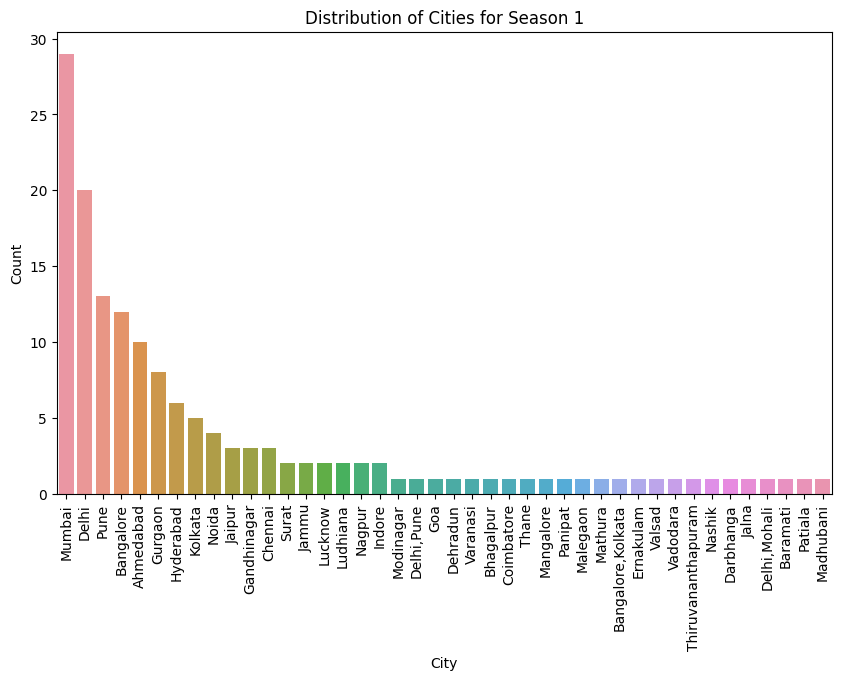

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_1_count.index, y=season_1_count.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities for Season 1')
plt.show()



In Season 1, maximum pitches come from city like Mumbai, followed by Delhi and then Pune.

In [16]:
season_2_counts = season_2_data['Pitchers City'].value_counts()


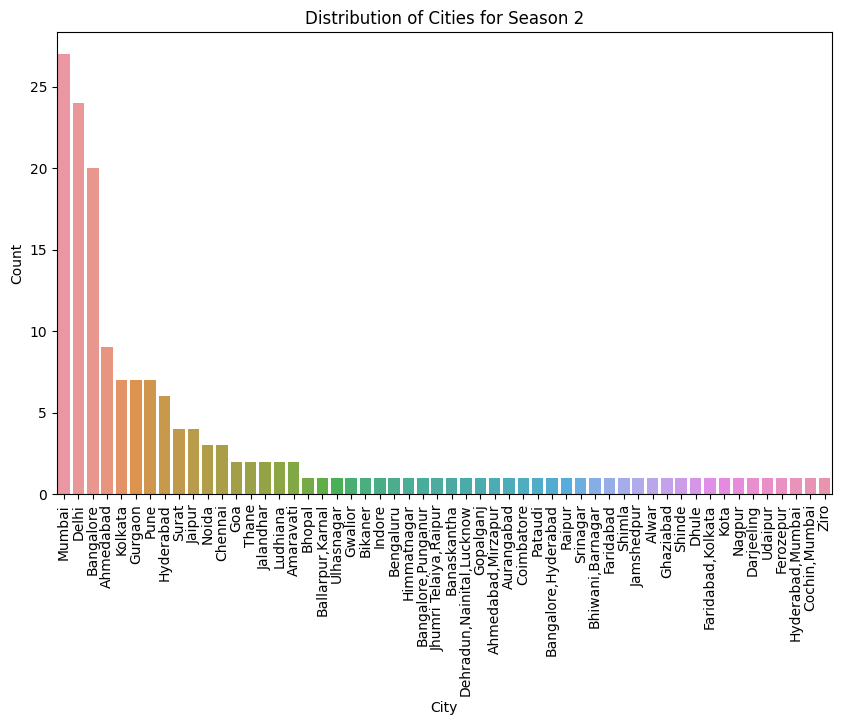

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_2_counts.index, y=season_2_counts.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities for Season 2')
plt.show()

In Season 2, maximum pitches come from city like Mumbai, followed by Delhi and then Bangalore.

# **Distribution of different industries that came for pitching in both the Seasons:**

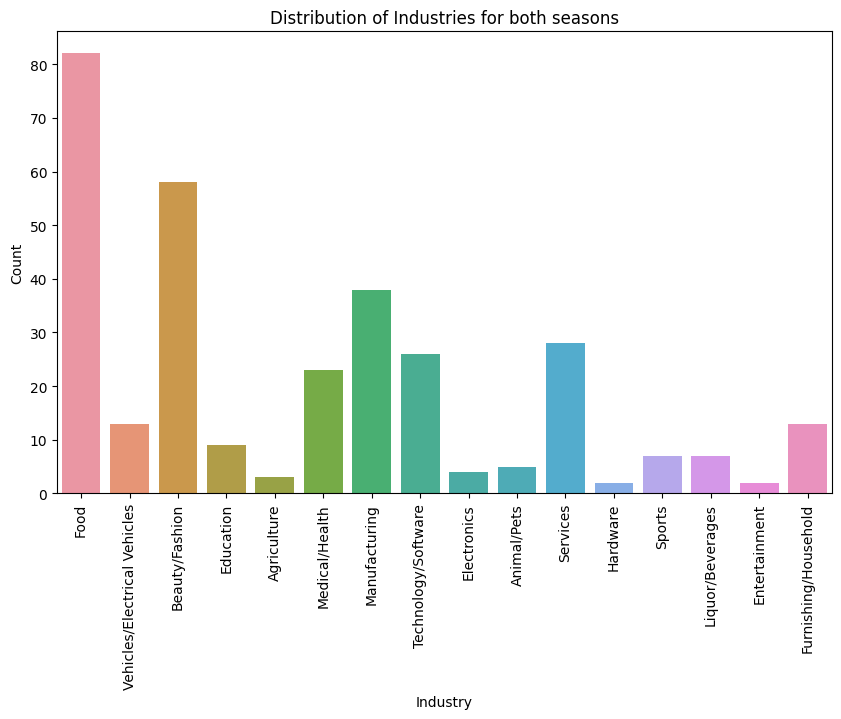

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', data = df)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Industries for both seasons')
plt.show()

In [21]:
tmp = df['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Different Industries came in Shark Tank India in Season 1 and 2 </b>", color = 'Industry',template='simple_white', text=tmp)
fig.show()

It can be seen that Food Industry is in leading position followed by Beauty/Fashion and Manufacturing.

# **Entreprenuers:**


**In Season 1:**

In [22]:
print('FOR SEASON 1','\n')
print('Total Entrepreneurs-', season_1_data['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-',  season_1_data['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round( season_1_data['Male Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-',  season_1_data['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round( season_1_data['Female Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-',  season_1_data['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round( season_1_data['Transgender Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-',  season_1_data['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round( season_1_data['Couple Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), '\n', sep ='')

FOR SEASON 1 

Total Entrepreneurs- 314 

Total Male Entrepreneurs- 220.0 

Male entrepreneurs percentage - 70.06%

Total Female Entrepreneurs- 92.0 

Female entrepreneurs percentage - 29.3%

Total Transgender Entrepreneurs- 2.0 

Transgender entrepreneurs percentage - 0.64%

Total Couple Entrepreneurs- 32.0 

Couple entrepreneurs percentage - 10.19



**In season 2:**

In [23]:
print('FOR SEASON 2','\n')
print('Total Entrepreneurs-', season_2_data['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-', season_2_data['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round(season_2_data['Male Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-', season_2_data['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round(season_2_data['Female Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-', season_2_data['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round(season_2_data['Transgender Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-', season_2_data['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round(season_2_data['Couple Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')


FOR SEASON 2 

Total Entrepreneurs- 351 

Total Male Entrepreneurs- 264.0 

Male entrepreneurs percentage - 75.21%

Total Female Entrepreneurs- 86.0 

Female entrepreneurs percentage - 24.5%

Total Transgender Entrepreneurs- 1.0 

Transgender entrepreneurs percentage - 0.28%

Total Couple Entrepreneurs- 27.0 

Couple entrepreneurs percentage - 7.69%



Here,we can see that in season 1 male entrepreneur is less than in season 2 but female entrepreneur, couple entrepreneur and transgender entrepreneur is more in season 1 than in season 2.

In [24]:
print('For Both Seasons','\n')
print('Total Entrepreneurs-', df['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-', df['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round(df['Male Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-', df['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round(df['Female Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-', df['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round(df['Transgender Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-', df['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round(df['Couple Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')

For Both Seasons 

Total Entrepreneurs- 665 

Total Male Entrepreneurs- 484.0 

Male entrepreneurs percentage - 72.78%

Total Female Entrepreneurs- 178.0 

Female entrepreneurs percentage - 26.77%

Total Transgender Entrepreneurs- 3.0 

Transgender entrepreneurs percentage - 0.45%

Total Couple Entrepreneurs- 59.0 

Couple entrepreneurs percentage - 8.87%



Overall it can be seen that male entrepreneurs are more than female, couple and transgender in both the seasons.

# Top 10 Highest Yearly Revenue of the brands in Season 1

In [25]:
print(season_1_data.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = season_1_data.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches in Season 1", text=tmpdf['Yearly Revenue'].map(int))
fig.show()

Startup Name
FrenchCrown          7200.0
GuardianGears        2500.0
RaisingSuperstars    1300.0
Eume                 1200.0
PlayBoxTV            1020.0
Alpino               1000.0
HammerLifestyle      1000.0
ShadesofSpring        900.0
TagzFoods             700.0
Devnagri              500.0
Name: Yearly Revenue, dtype: float64


In season 1 highest revenue among the brands was earned by French Crown, followed by Guardian Gears and Raising Superstars.

# Top 10 Highest Yearly Revenue of the brands in Season 2

In [26]:
print(season_2_data.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = season_2_data.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches in Season 2", text=tmpdf['Yearly Revenue'].map(int))
fig.show()

Startup Name
Rubans               5100.0
Toyshine             4500.0
GunjanAppsStudios    2400.0
UnStop               1600.0
StyloBug             1400.0
DesmondJi            1200.0
oyehappy             1005.0
BlueTea              1000.0
Aadvik                720.0
NishHair              670.0
Name: Yearly Revenue, dtype: float64


In season 2 highest revenue among the brands was earned by Ruban, followed by Toyshine and Gunjan Apps Studio.

# Top 10 Highest Gross margins of the brands in Season 1

In [27]:
print(season_1_data.groupby('Startup Name')['Gross Margin'].max().nlargest(10))
tmpdf = season_1_data.sort_values('Gross Margin', ascending = False)[0:10]
fig= px.bar(tmpdf, x= "Startup Name", y = "Gross Margin", color = "Startup Name", title = "Highest Gross Margin of the brands in Season 1", text = tmpdf['Gross Margin'].map(int))
fig.show()

Startup Name
Poo-de-Cologne      150.0
Farda               115.0
Cocofit              95.0
Auli                 80.0
CosIQ                75.0
TheaandSid           75.0
Bummer               70.0
FrenchCrown          70.0
Moonshine            70.0
NomadFoodProject     70.0
Name: Gross Margin, dtype: float64


# Top 10 Highest Gross margin of the brand in Season 2:

In [28]:
print(season_2_data.groupby('Startup Name')["Gross Margin"].max().nlargest(10))
tmpdf = season_2_data.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x = 'Startup Name', y = 'Gross Margin', color = 'Startup Name',title = 'Highest Gross margin of the brands in season 2', text = tmpdf['Gross Margin'].map(int))
fig.show()

Startup Name
UnStop                90.0
MidNightAngelsByPC    83.0
LeafyAffair           80.0
Pflow                 80.0
ekatra                80.0
oyehappy              80.0
Dabble                75.0
JaipurWatchCompany    75.0
CraveRajaFoods        70.0
AvimeeHerbal          69.0
Name: Gross Margin, dtype: float64


# How many accepted or rejected offer in season 1 and 2?

For Season 1
1    63%
0    37%
Name: Received Offer, dtype: object 



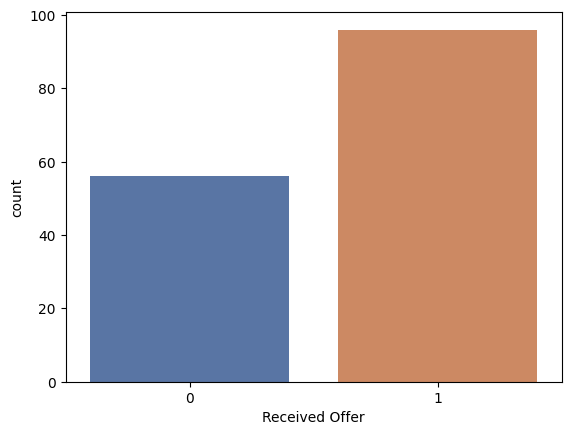

In [29]:
print('For Season 1')
print(round(season_1_data['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=season_1_data, palette='deep')
plt.show()

In season 1, 63% of the company received offer from the Sharks.

For Season 1
1.0    73%
0.0    27%
Name: Accepted Offer, dtype: object 



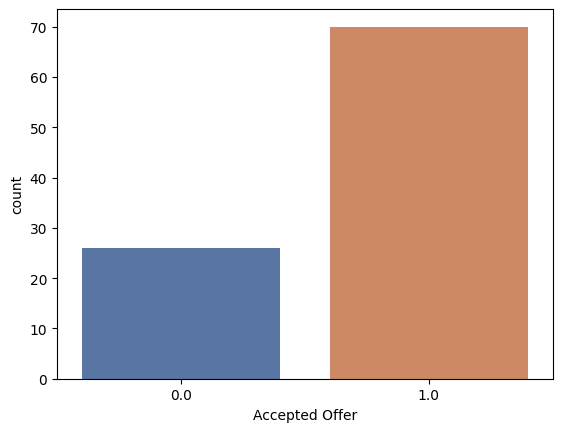

In [30]:
print('For Season 1')
print(round(season_1_data['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=season_1_data, palette='deep')
plt.show()

In season 1, 63% of the companies have accepted the offer given by the Sharks.

For Season 2
1    71%
0    29%
Name: Received Offer, dtype: object 



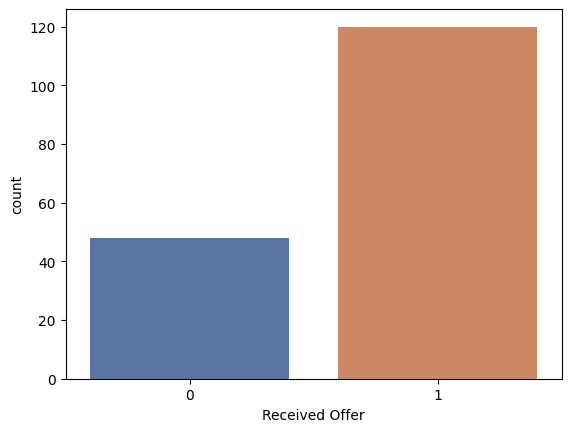

In [31]:
print('For Season 2')
print(round(season_2_data['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=season_2_data, palette='deep')
plt.show()

In Season 2, 71% of the companies that came received offer from Sharks, only 29% of them were unable to convinced the Sharks

For Season 2
1.0    88%
0.0    12%
Name: Accepted Offer, dtype: object 



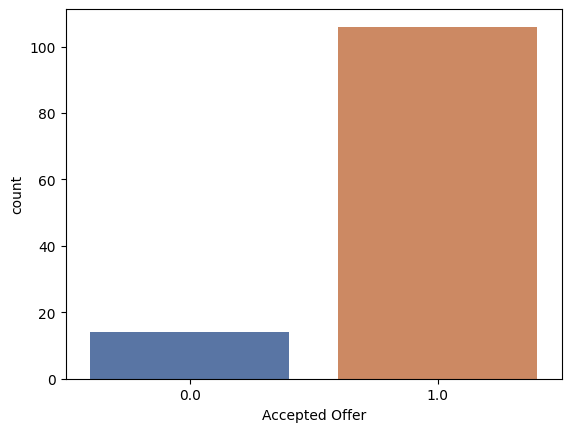

In [32]:
print('For Season 2')
print(round(season_2_data['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=season_2_data, palette='deep')
plt.show()

In Season 2, 88% of the companies have accepted  offer from Sharks.

In [33]:
print('For Season 1 and 2')
print('Total offer receieved for Season 1 and 2')
print(round(df['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%') ,"\n")
print('Total offer accepted for Season 1 and 2')
print(round(df['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")


For Season 1 and 2
Total offer receieved for Season 1 and 2
1    68%
0    32%
Name: Received Offer, dtype: object 

Total offer accepted for Season 1 and 2
1.0    81%
0.0    19%
Name: Accepted Offer, dtype: object 



# Rejected offer in season1:

In [34]:
print("For Season 1: Companies that rejected the offer are:")
season_1_data.loc[season_1_data['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Offered Equity","Valuation Requested"]]

For Season 1: Companies that rejected the offer are:


,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested
6,qZenseLabs,100.0,0.25,40000.0
19,Torch-it,75.0,1.00,7500.0
21,LaKheerDeli,50.0,7.50,667.0
27,KabiraHandmad,100.0,5.00,2000.0
41,MorrikoPureFoods,100.0,3.00,3333.0
55,IndiaHempandCo,50.0,4.00,1250.0
60,KetoIndia,150.0,1.25,12000.0
70,Moonshine,80.0,0.50,16000.0
71,Falhari,50.0,2.00,2500.0
73,UrbanMonkey,100.0,1.00,10000.0


# Rejected offer in season 2:

In [35]:
print("Season 2: Companies that rejected the offer from Sharks are:")
season_2_data.loc[season_2_data['Accepted Offer']== 0 , ['Startup Name','Original Ask Amount', 'Original Offered Equity','Valuation Requested']]

Season 2: Companies that rejected the offer from Sharks are:


,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested
158,ATMOSPHERE,75.0,3.0,2500.000000
165,Flatheads,75.0,3.0,2500.000000
189,Diabexy,150.0,1.0,15000.000000
199,AvimeeHerbal,280.0,0.5,56000.000000
206,PMV,100.0,1.0,10000.000000
212,CheeseCake&Co.,100.0,2.0,5000.000000
215,BeUnic,100.0,10.0,1000.000000
229,GavinParis,50.0,5.0,1000.000000
233,HobbyIndia,50.0,3.0,1666.666667
237,DesiToys,50.0,3.0,1666.666667


# Industry wise investment of different Sharks in both the season:

Food                            8
Vehicles/Electrical Vehicles    3
Education                       3
Manufacturing                   2
Beauty/Fashion                  2
Animal/Pets                     1
Sports                          1
Technology/Software             1
Name: Industry, dtype: int64


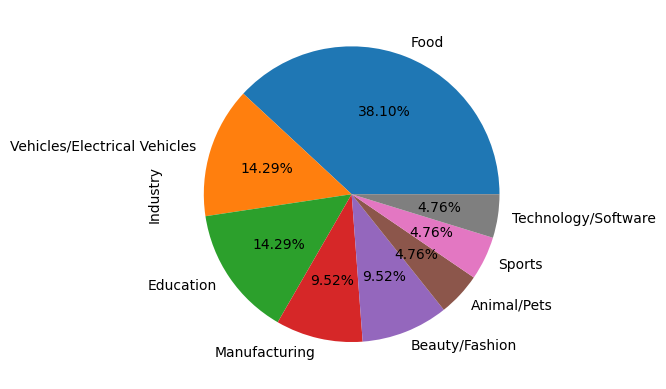

In [36]:
print(df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf =df.loc[df['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Ashneer's have more food industry based startup.

Beauty/Fashion          13
Medical/Health          12
Food                    11
Manufacturing            8
Services                 6
Technology/Software      5
Education                3
Furnishing/Household     3
Sports                   2
Animal/Pets              1
Entertainment            1
Agriculture              1
Name: Industry, dtype: int64


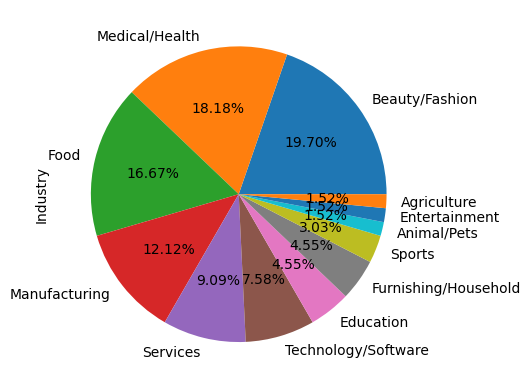

In [37]:
print(df[df['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf =df.loc[df['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Namita's have more beauy/fashion based start up.

Food                            13
Beauty/Fashion                  11
Manufacturing                    7
Medical/Health                   6
Technology/Software              3
Vehicles/Electrical Vehicles     2
Education                        2
Animal/Pets                      1
Sports                           1
Electronics                      1
Liquor/Beverages                 1
Services                         1
Furnishing/Household             1
Name: Industry, dtype: int64


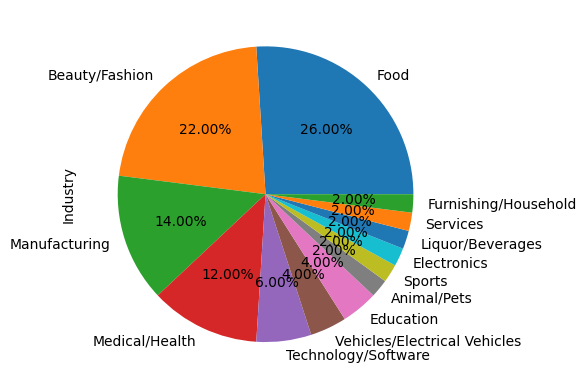

In [38]:
print(df[df['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf =df.loc[df['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Anupam has also based on mostly food start up.

Food                            17
Beauty/Fashion                  10
Medical/Health                   3
Manufacturing                    3
Vehicles/Electrical Vehicles     2
Liquor/Beverages                 2
Furnishing/Household             2
Sports                           1
Electronics                      1
Technology/Software              1
Services                         1
Name: Industry, dtype: int64


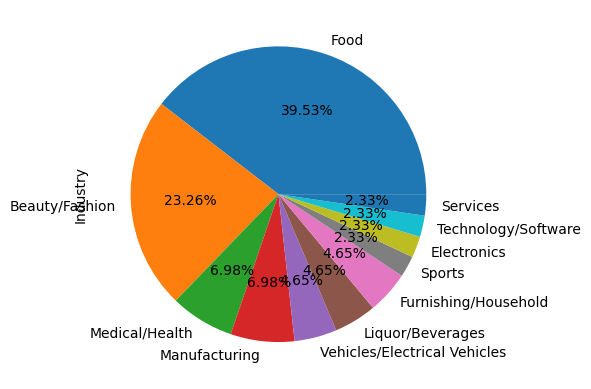

In [39]:
print(df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf =df.loc[df['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Vineeta is also into Food and Beauty and Fashion Industries.

Food                            18
Beauty/Fashion                  14
Medical/Health                   8
Manufacturing                    7
Technology/Software              7
Services                         7
Vehicles/Electrical Vehicles     3
Education                        3
Liquor/Beverages                 2
Electronics                      1
Animal/Pets                      1
Entertainment                    1
Name: Industry, dtype: int64


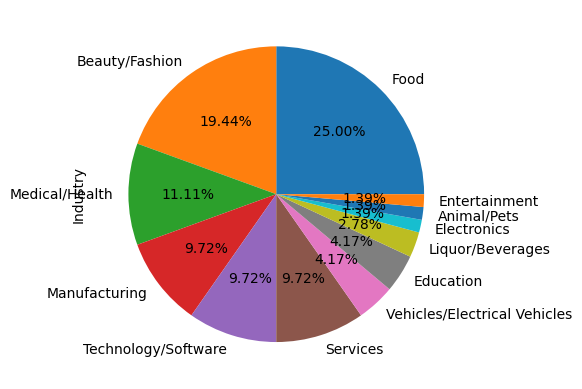

In [40]:
print(df[df['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()
tmpdf =df.loc[df['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Aman is also into Food and Beauty and Fashion Industries.

Medical/Health                  11
Manufacturing                   11
Food                             8
Technology/Software              8
Services                         8
Beauty/Fashion                   7
Education                        3
Agriculture                      2
Sports                           2
Liquor/Beverages                 2
Furnishing/Household             2
Animal/Pets                      1
Hardware                         1
Entertainment                    1
Vehicles/Electrical Vehicles     1
Name: Industry, dtype: int64


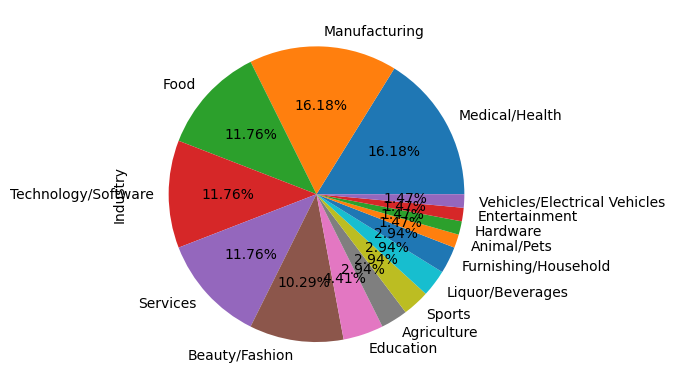

In [41]:
print(df[df['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()
tmpdf =df.loc[df['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Peyush has more Health/Medical and Manufacturing based startup then food or others.

Food              3
Medical/Health    2
Manufacturing     2
Beauty/Fashion    1
Name: Industry, dtype: int64


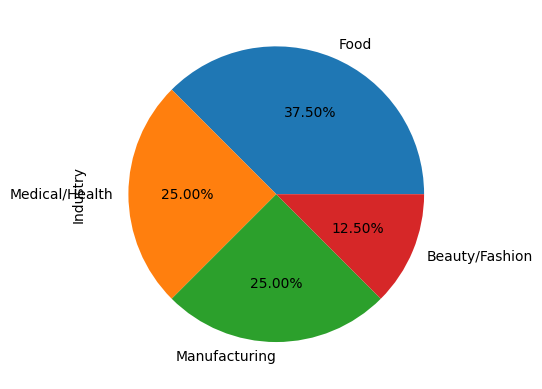

In [42]:
print(df[df['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()
tmpdf =df.loc[df['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Ghazal has mostly into food industry based start up like most of the Sharks.

Food                            6
Beauty/Fashion                  5
Medical/Health                  3
Services                        2
Technology/Software             2
Manufacturing                   1
Furnishing/Household            1
Vehicles/Electrical Vehicles    1
Name: Industry, dtype: int64


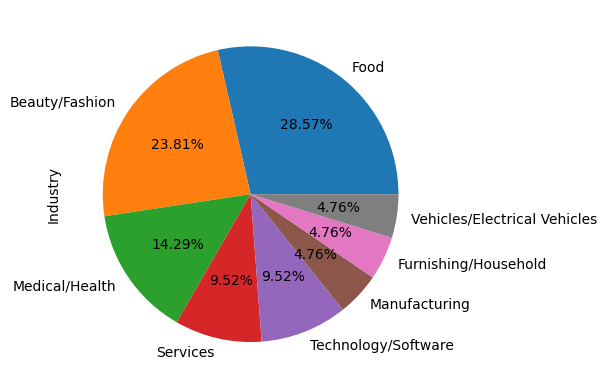

In [43]:
print(df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()
tmpdf =df.loc[df['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", title="<b>Total equity received by Amit (in %) for investment (in lakhs)</b>", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Amit like most of the sharks is on startup of food and Fashion/Beauty Industry based.